In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import copy
warnings.simplefilter("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False 

In [63]:
from sklearn.datasets import load_iris 
iris = load_iris()
x, y = iris["data"], iris["target"]

In [64]:
# 计算协方差
shp = x.shape[1]
arr_cov = np.zeros((shp, shp))
for i in range(shp):
    for j in range(i, shp):
        x1, x2 = x[:,i], x[:,j]
        cov = np.sum((x1-x1.mean())*(x2-x2.mean()))/(len(x1)-1)
        arr_cov[i][j] = arr_cov[j][i] = cov
# print(arr_cov)

# 求特征根和特征向量
eig, eiv = np.linalg.eig(arr_cov)
srt = eig.argsort()[::-1]  # 特征根按照大小顺序排列
eig = eig[srt]
eiv = eiv[:, srt]

In [69]:
print(arr_cov)
print(eig)
print(eiv)

# 特征根检查
# Ax=λx
dim = 3
print(arr_cov @ eiv[:, dim])
print(eig[dim] * eiv[:, dim])

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
[4.22824171 0.24267075 0.0782095  0.02383509]
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]
[ 0.00751967 -0.00762063 -0.01143701  0.01796349]
[ 0.00751967 -0.00762063 -0.01143701  0.01796349]


In [66]:
# 降维矩阵
dim = 2
x_pca = x @ eiv[:, 0:dim]
print(x.shape)
print(x_pca.shape)

(150, 4)
(150, 2)


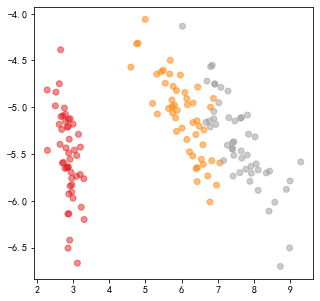

In [77]:
plt.figure(figsize=(5, 5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap='Set1', alpha=0.5)
plt.show()